# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 4 - Regularization 



**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

# from pandas.core import datetools
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 500)

In this homework, we will focus on regularization and cross validation. We will continue to build regression models for the [Capital Bikeshare program](https://www.capitalbikeshare.com) in Washington D.C.  See homework 3 for more information about the Capital Bikeshare data that we'll be using extensively. 

## Data pre-processing

**1.1** Read in the provided `bikes_student.csv` to a data frame named `bikes_main`. Split it into a training set `bikes_train` and a validation set `bikes_val`. Use `random_state=90`, a test set size of .2, and stratify on month. Remember to specify the data's index column as you read it in.

<Axes: xlabel='temp', ylabel='hum'>

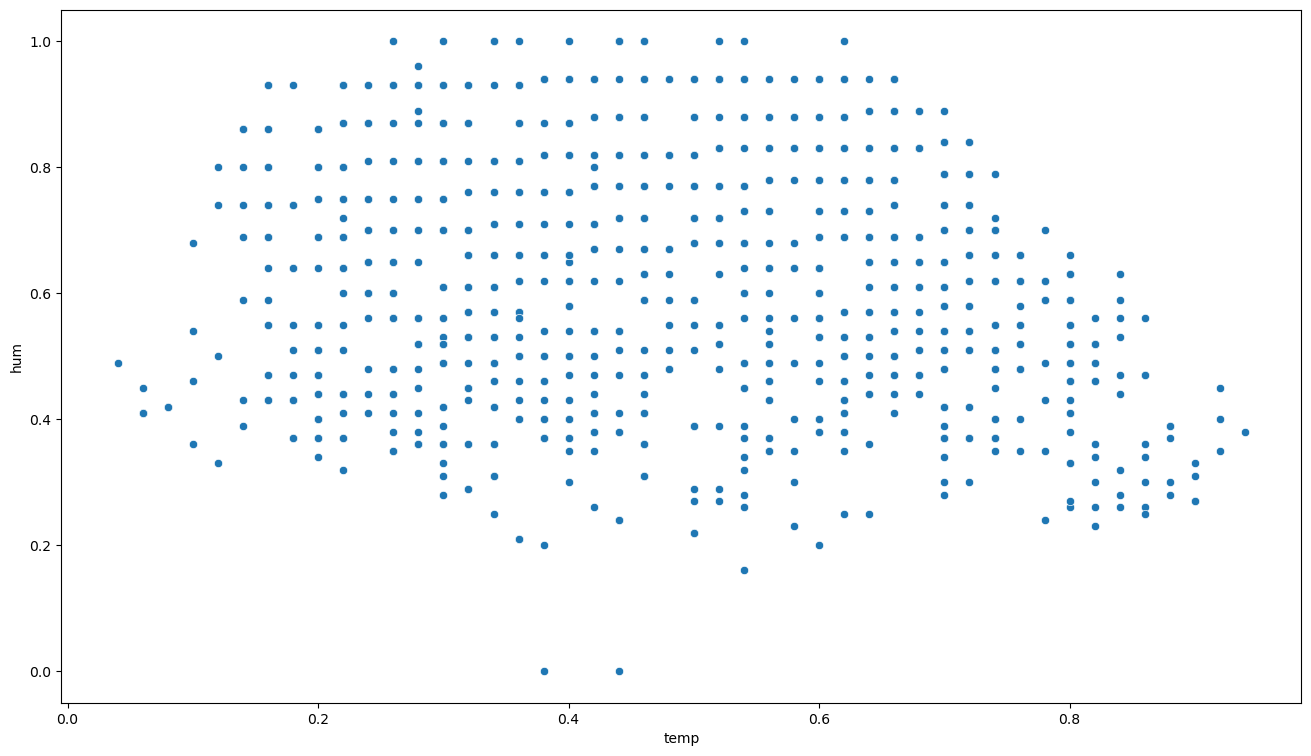

In [4]:
plt.figure(figsize=(16,9))
sns.scatterplot(data = bikes_main, x = "temp", y = "hum")
z = bikes_main[temp] *2 + bikes_main["hum"]*4
sns.scatterplot()

In [3]:
bikes_main = pd.read_csv("data/bikes_student.csv", index_col=0).reset_index(drop =True)
bikes_main.head()

,dteday,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,counts,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
0,2011-09-07,19,0,0,1,0.64,0.5758,0.89,0.0000,14,212,226,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,9
1,2012-03-21,1,1,0,1,0.52,0.5000,0.83,0.0896,4,22,26,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3
2,2012-08-16,23,1,0,1,0.70,0.6515,0.54,0.1045,58,168,226,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,8
3,2011-04-28,13,0,0,1,0.62,0.5758,0.83,0.2985,18,103,121,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,4
4,2012-01-04,0,1,0,1,0.08,0.0606,0.42,0.3284,0,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [4]:
bikes_train, bikes_val = train_test_split(bikes_main, test_size = .2, random_state=90, stratify=bikes_main["month"])

In [10]:
# your code here
bikes_main = pd.read_csv("data/bikes_student.csv", index_col=0).reset_index(drop=True)
# reset index from 0 to max, the original index is not organized

In [12]:
bikes_main.head()

,dteday,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,counts,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
0,2011-09-07,19,0,0,1,0.64,0.5758,0.89,0.0000,14,212,226,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,9
1,2012-03-21,1,1,0,1,0.52,0.5000,0.83,0.0896,4,22,26,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3
2,2012-08-16,23,1,0,1,0.70,0.6515,0.54,0.1045,58,168,226,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,8
3,2011-04-28,13,0,0,1,0.62,0.5758,0.83,0.2985,18,103,121,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,4
4,2012-01-04,0,1,0,1,0.08,0.0606,0.42,0.3284,0,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [13]:
bikes_main.describe()

,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,counts,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0,1250.000000
mean,11.410400,0.514400,0.030400,0.675200,0.494160,0.473600,0.63844,0.197306,36.050400,159.288000,195.338400,0.077600,0.084800,0.082400,0.085600,0.083200,0.085600,0.084800,0.082400,0.083200,0.082400,0.085600,0.252800,0.255200,0.248000,0.140800,0.141600,0.15520,0.138400,0.129600,0.148000,0.276800,0.086400,0.0,6.533600
std,6.885456,0.499993,0.171754,0.468488,0.192529,0.171707,0.18818,0.123924,50.958026,161.031847,192.251045,0.267648,0.278695,0.275083,0.279884,0.276295,0.279884,0.278695,0.275083,0.276295,0.275083,0.279884,0.434791,0.436148,0.432025,0.347954,0.348779,0.36224,0.345458,0.335997,0.355242,0.447596,0.281066,0.0,3.441503
min,0.000000,0.000000,0.000000,0.000000,0.040000,0.060600,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,5.000000,0.000000,0.000000,0.000000,0.340000,0.333300,0.50000,0.104500,3.000000,32.250000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000
50%,11.000000,1.000000,0.000000,1.000000,0.500000,0.484800,0.65000,0.194000,15.000000,113.500000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000
75%,17.000000,1.000000,0.000000,1.000000,0.660000,0.621200,0.80000,0.283600,50.000000,231.750000,289.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,10.000000
max,23.000000,1.000000,1.000000,1.000000,0.940000,0.909100,1.00000,0.850700,362.000000,810.000000,970.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,12.000000


In [14]:
bikes_train, bikes_val = train_test_split(bikes_main, test_size=.2, random_state=90, stratify=bikes_main['month'])

In [15]:
print(bikes_train.shape)
print(bikes_val.shape)

(1000, 36)
(250, 36)


**1.2** As with last homework, the response will be the `counts` column and we'll drop `counts`, `registered` and `casual` for being trivial predictors, drop `workingday` and `month` for being multicolinear with other columns, and `dteday` for being inappropriate for regression. Write code to do this.

Encapsulate this process as a function with appropriate inputs and outputs, and test your code by producing `practice_y_train` and `practice_X_train`


In [5]:
def data_clean(train, cols, response):
    train_x = train.drop(cols, axis = 1)
    train_y = train[response]

    # val_x = val.drop(["counts","registered","casual","workingday","month","dteday"], axis = 1)
    # val_y = val["counts"]

    return train_x, train_y

drop_cols = ["counts","registered","casual","workingday","month","dteday"]
response = "counts"
practice_X_train, practice_y_train = data_clean(bikes_train, drop_cols, response)

In [6]:
# your code here
def process(df, columns_to_drop, response):    
    y_df = df[response]
    X_df = df.drop(columns_to_drop, axis=1)
    
    return y_df, X_df

In [9]:
columns_to_drop = ['counts', 'registered', 'casual', 'workingday', 'month', 'dteday']
reponse_variable = 'counts'

In [10]:
practice_y_train, practice_X_train = process(bikes_train, columns_to_drop, reponse_variable)
print(practice_X_train.shape)
print(practice_y_train.shape)
print(practice_X_train.columns)

(1000, 30)
(1000,)
Index(['hour', 'year', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring', 'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Cloudy', 'Snow', 'Storm'], dtype='object')


**1.3** Write a function to standardize a provided subset of columns in your training/validation/test sets. Remember that while you will be scaling all of your data, you must learn the scaling parameters (mean and SD) from only the training set.

Test your code by building a list of all non-binary columns in your `practice_X_train` and scaling only those columns. Call the result `practice_X_train_scaled`. Display the `.describe()` and verify that you have correctly scaled all columns, including the polynomial columns.

**Hint: employ the provided list of binary columns and use `pd.columns.difference()`**

`binary_columns = [ 'holiday', 'workingday','Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring',
       'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Cloudy', 'Snow', 'Storm']`


In [135]:
a = pd.DataFrame(data = [[1,1,1],
     [2,2,2]], index=[0,1])

b = pd.DataFrame(data = [[3,3,3],
     [4,4,4]], index=[1,2])

pd.concat([a,b], axis =1)

,0,1,2,0,1,2
0,1.0,1.0,1.0,NaN,NaN,NaN
1,2.0,2.0,2.0,3.0,3.0,3.0
2,NaN,NaN,NaN,4.0,4.0,4.0


In [7]:
def scaling(train, val = None):
    # the value of a in the statement a = None is neither True nor False. In Python, 
    # None is a special constant that represents the absence of a value or a null value. 
    # !!!!!!!!!!!!
    
    scale = StandardScaler()
    train = scale.fit_transform(train)
    if val is not None:
        val = scale.transform(val)
        return train, val
    else:
        return train

practice_X_train = practice_X_train.reset_index(drop=True)
# !!!!!!!!!!!!!!!!
binary_columns = [ 'holiday','Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring',
       'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Cloudy', 'Snow', 'Storm','year']
non_bi = set(practice_X_train.columns.tolist())^set(binary_columns)

X_train_scaled= scaling(practice_X_train[non_bi])

practice_X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=practice_X_train[non_bi].columns)
# create a new column with new index from 0 to 1000, the original index in the first row becomes 0
# but practice_X_train still use old index
# when concat, they are contact according to index, leading to NAs to some rows
practice_X_train_scaled = pd.concat([practice_X_train_scaled,practice_X_train[binary_columns]], axis = 1)
practice_X_train_scaled.shape


(1000, 30)

In [8]:
# your code here
def standardize(df, target_column, mean=np.inf, std=np.inf):
    if target_column in df.columns: 
        df_scaled = df 
    
        if mean == np.inf:
            mean = np.mean(df_scaled[target_column])
            
        if std == np.inf: 
            std = np.std(df_scaled[target_column])
            
        df_scaled[target_column] = df_scaled[target_column].apply(lambda x: (x - mean) / std) 
        # df_scaled[target_column] = (df_scaled[target_column] - mean) / std

        return df_scaled, mean, std
    
    return

In [55]:
binary_columns = ['holiday', 'workingday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring', 
                  'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 
                  'Sat', 'Cloudy', 'Snow', 'Storm']
nonbinary_columns = practice_X_train.columns.difference(binary_columns)
nonbinary_columns
# !!!!!

Index(['atemp', 'hour', 'hum', 'temp', 'windspeed', 'year'], dtype='object')

In [13]:
practice_X_train[nonbinary_columns].describe()

,atemp,hour,hum,temp,windspeed,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.472546,11.319000,0.639740,0.492780,0.195421,0.509000
std,0.171544,6.879431,0.188386,0.192935,0.125800,0.500169
min,0.060600,0.000000,0.000000,0.040000,0.000000,0.000000
25%,0.333300,5.000000,0.500000,0.340000,0.104500,0.000000
50%,0.484800,11.000000,0.650000,0.500000,0.194000,1.000000
75%,0.621200,17.000000,0.800000,0.660000,0.253700,1.000000
max,0.909100,23.000000,1.000000,0.940000,0.850700,1.000000


In [14]:
bikes_main['year'].value_counts()

1    643
0    607
Name: year, dtype: int64

**Since there are only two values for `year`, we can treat this predictor as a binary predictor. Thus, there is no need to standardize `year` column.**

In [56]:
nonbinary_columns = nonbinary_columns.difference(['year'])
nonbinary_columns

Index(['atemp', 'hour', 'hum', 'temp', 'windspeed'], dtype='object')

In [57]:
practice_X_train_scaled = practice_X_train.copy()

for target_column in nonbinary_columns:
    practice_X_train_scaled, target_column_mean, target_column_stdev = standardize(practice_X_train_scaled, target_column)

In [58]:
practice_X_train_scaled[nonbinary_columns].describe()

,atemp,hour,hum,temp,windspeed
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.579359e-16,-6.394885e-17,9.947598e-17,-1.412204e-16,-1.136868e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.399662e+00,-1.646166e+00,-3.406658e+00,-2.346918e+00,-1.557237e+00
25%,-8.100799e-01,-9.184181e-01,-7.473672e-01,-7.910878e-01,-7.255332e-01
50%,7.302108e-02,-4.512038e-02,5.042016e-02,3.868831e-02,-1.321255e-02
75%,8.681034e-01,8.281773e-01,8.482075e-01,8.684644e-01,4.619331e-01
max,2.546287e+00,1.701475e+00,1.911924e+00,2.320573e+00,5.213390e+00


In [18]:
practice_X_train.describe()

,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.0
mean,11.319000,0.509000,0.027000,0.492780,0.472546,0.639740,0.195421,0.078000,0.085000,0.082000,0.086000,0.08300,0.086000,0.085000,0.082000,0.08300,0.082000,0.086000,0.255000,0.258000,0.248000,0.143000,0.148000,0.162000,0.128000,0.12700,0.15000,0.280000,0.082000,0.0
std,6.879431,0.500169,0.162164,0.192935,0.171544,0.188386,0.125800,0.268306,0.279021,0.274502,0.280504,0.27602,0.280504,0.279021,0.274502,0.27602,0.274502,0.280504,0.436079,0.437753,0.432068,0.350248,0.355278,0.368635,0.334257,0.33314,0.35725,0.449224,0.274502,0.0
min,0.000000,0.000000,0.000000,0.040000,0.060600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0
25%,5.000000,0.000000,0.000000,0.340000,0.333300,0.500000,0.104500,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0
50%,11.000000,1.000000,0.000000,0.500000,0.484800,0.650000,0.194000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0
75%,17.000000,1.000000,0.000000,0.660000,0.621200,0.800000,0.253700,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.0
max,23.000000,1.000000,1.000000,0.940000,0.909100,1.000000,0.850700,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,0.0


In [19]:
practice_X_train_scaled.describe()

,hour,year,holiday,temp,atemp,hum,windspeed,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.0
mean,-1.811190e-16,0.509000,0.027000,-4.038325e-15,4.026779e-15,-4.013789e-15,8.927858e-15,0.078000,0.085000,0.082000,0.086000,0.08300,0.086000,0.085000,0.082000,0.08300,0.082000,0.086000,0.255000,0.258000,0.248000,0.143000,0.148000,0.162000,0.128000,0.12700,0.15000,0.280000,0.082000,0.0
std,1.000500e+00,0.500169,0.162164,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.268306,0.279021,0.274502,0.280504,0.27602,0.280504,0.279021,0.274502,0.27602,0.274502,0.280504,0.436079,0.437753,0.432068,0.350248,0.355278,0.368635,0.334257,0.33314,0.35725,0.449224,0.274502,0.0
min,-1.646163e+00,0.000000,0.000000,-2.347976e+00,-2.402605e+00,-3.397602e+00,-1.554205e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0
25%,-9.189949e-01,0.000000,0.000000,-7.922693e-01,-8.121270e-01,-7.421467e-01,-7.231056e-01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0
50%,-4.639332e-02,1.000000,0.000000,3.744066e-02,7.147176e-02,5.448995e-02,-1.130295e-02,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.0
75%,8.262083e-01,1.000000,0.000000,8.671507e-01,8.670022e-01,8.511266e-01,4.634972e-01,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.0
max,1.698810e+00,1.000000,1.000000,2.319143e+00,2.546131e+00,1.913309e+00,5.211499e+00,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,0.0


**1.4** Write a code to augment your a dataset with higher-order features for `temp`, `atemp`, `hum`,`windspeed`, and `hour`. You should include ONLY pure powers of these columns. So with degree=2 you should produce `atemp^2` and `hum^2` but not `atemp*hum` or any other two-feature interactions. 


Encapsulate this process as a function with apropriate inputs and outputs, and test your code by producing `practice_X_train_poly`, a training dataset with qudratic and cubic features built from `practice_X_train_scaled`, and printing `practice_X_train_poly`'s column names and `.head()`.

In [9]:
def poly_function(train_data, degree):
    poly_object = PolynomialFeatures(degree=degree, include_bias=False)
    poly_data = poly_object.fit_transform(train_data)
    poly_df = pd.DataFrame(data = poly_data, columns=poly_object.get_feature_names_out())
    return poly_df
cols = ["temp", "atemp","hum","windspeed","hour"]
df = {}
practice_X_train_poly = practice_X_train_scaled.copy().drop(cols, axis =1)
for col in cols:
    df[col] = poly_function(practice_X_train_scaled[[col]], degree=3)
    practice_X_train_poly = pd.concat([practice_X_train_poly, df[col]], axis=1)

practice_X_train_poly.head()

,holiday,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,year,temp,temp^2,temp^3,atemp,atemp^2,atemp^3,hum,hum^2,hum^3,windspeed,windspeed^2,windspeed^3,hour,hour^2,hour^3
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.246132,0.060581,0.014911,0.250224,0.062612,0.015667,0.475907,0.226487,0.107787,-0.725533,0.526398,-0.381919,1.701475,2.895017,4.925799
1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.387074,1.923976,2.668697,1.133325,1.284426,1.455672,-1.545155,2.387503,-3.689061,0.224758,0.050516,0.011354,-0.045120,0.002036,-0.000092
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.868464,0.754230,0.655022,0.868103,0.753604,0.654206,0.263163,0.069255,0.018225,-1.557237,2.424987,-3.776280,-1.355067,1.836206,-2.488182
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,-0.998532,0.997066,-0.995602,-0.986700,0.973577,-0.960629,0.901393,0.812510,0.732391,-0.488358,0.238494,-0.116470,-0.918418,0.843492,-0.774678
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1.075908,1.157579,1.245449,1.044724,1.091447,1.140261,-0.162323,0.026349,-0.004277,-0.250387,0.062694,-0.015698,1.410376,1.989160,2.805463


In [10]:
# your code here
def poly(df, target_column, degree):
    tra = PolynomialFeatures(degree, include_bias=False)
    array_poly = tra.fit_transform(df[target_column].values.reshape(-1,1))
    df_poly = pd.DataFrame(array_poly)
    
    for i in range(degree): 
        if i == 0: 
            df_poly = df_poly.rename(columns={i: '%s' % target_column})
        else: 
            df_poly = df_poly.rename(columns={i: '%s_%i' % (target_column, (i+1))})
    
    return df_poly

In [104]:
practice_X_train_poly = practice_X_train_scaled.copy().reset_index(drop=True)
ploy_columns = ['temp', 'atemp', 'hum', 'windspeed', 'hour']
practice_X_train_poly = practice_X_train_poly.drop(ploy_columns, axis=1)

for target_column in ploy_columns:
    df_poly = poly(practice_X_train_scaled, target_column, 3) 
    practice_X_train_poly = practice_X_train_poly.merge(df_poly, left_index=True, right_index=True)

In [106]:
practice_X_train_poly.head(-5)

,year,holiday,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,temp,temp_2,temp_3,atemp,atemp_2,atemp_3,hum,hum_2,hum_3,windspeed,windspeed_2,windspeed_3,hour,hour_2,hour_3
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.246132,0.060581,0.014911,0.250224,0.062612,0.015667,0.475907,0.226487,0.107787,-0.725533,0.526398,-0.381919,1.701475,2.895017,4.925799
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.387074,1.923976,2.668697,1.133325,1.284426,1.455672,-1.545155,2.387503,-3.689061,0.224758,0.050516,0.011354,-0.045120,0.002036,-0.000092
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.868464,0.754230,0.655022,0.868103,0.753604,0.654206,0.263163,0.069255,0.018225,-1.557237,2.424987,-3.776280,-1.355067,1.836206,-2.488182
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,-0.998532,0.997066,-0.995602,-0.986700,0.973577,-0.960629,0.901393,0.812510,0.732391,-0.488358,0.238494,-0.116470,-0.918418,0.843492,-0.774678
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1.075908,1.157579,1.245449,1.044724,1.091447,1.140261,-0.162323,0.026349,-0.004277,-0.250387,0.062694,-0.015698,1.410376,1.989160,2.805463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1.283352,1.646994,2.113673,1.133325,1.284426,1.455672,-0.694181,0.481888,-0.334518,-0.725533,0.526398,-0.381919,-0.627319,0.393529,-0.246868
991,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.687366,0.472472,-0.324761,-0.810080,0.656229,-0.531598,-0.375066,0.140675,-0.052762,0.461933,0.213382,0.098568,1.410376,1.989160,2.805463
992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.376200,0.141526,-0.053242,-0.280219,0.078523,-0.022004,0.369535,0.136556,0.050462,0.699904,0.489866,0.342859,-0.481769,0.232102,-0.111819
993,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.102254,1.214963,-1.339198,-1.074719,1.155020,-1.241322,-1.013296,1.026769,-1.040422,-0.488358,0.238494,-0.116470,1.410376,1.989160,2.805463


In [23]:
practice_X_train_poly.columns

Index(['year', 'holiday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring', 'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Cloudy', 'Snow', 'Storm', 'temp', 'temp_2', 'temp_3', 'atemp', 'atemp_2', 'atemp_3', 'hum', 'hum_2', 'hum_3', 'windspeed', 'windspeed_2', 'windspeed_3', 'hour', 'hour_2', 'hour_3'], dtype='object')

**1.5** Write code to add interaction terms to the model. Specifically, we want interactions between the continuous predictors (`temp`,`atemp`, `hum`,`windspeed`) and the month and weekday dummies (`Feb`, `Mar`...`Dec`, `Mon`, `Tue`, ... `Sat`). That means you SHOULD build `atemp*Feb` and `hum*Mon` and so on, but NOT `Feb*Mar` and NOT `Feb*Tue`. The interaction terms should always be a continuous feature times a month dummy or a continuous feature times a weekday dummy.


Encapsulate this process as a function with appropriate inputs and outputs, and test your code by adding interaction terms to `practice_X_train_poly` and show its column names and `.head()`**


In [107]:
tmp = practice_X_train_poly.columns[2:13].tolist().extend(practice_X_train_poly.columns[16:22].tolist())
# tmp is None, as extend does not return anything

In [11]:
con_cols = ["temp", "atemp", "hum", "windspeed"]
dum_cols = practice_X_train_poly.columns[2:13].tolist()
day = practice_X_train_poly.columns[16:22].tolist()
dum_cols.extend(day)
def interaction_function(data, continuous, dummies):
    for con in continuous:
        for dum in dummies:
            data[f"{con}_{dum}"] = data[con] * data[dum]
    return data

practice_X_train_inter = interaction_function(practice_X_train_poly, con_cols, dum_cols)
practice_X_train_inter.head()
    


,holiday,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,year,temp,temp^2,temp^3,atemp,atemp^2,atemp^3,hum,hum^2,hum^3,windspeed,windspeed^2,windspeed^3,hour,hour^2,hour^3,temp_Mar,temp_Apr,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sept,temp_Oct,temp_Nov,temp_Dec,temp_spring,temp_Tue,temp_Wed,temp_Thu,temp_Fri,temp_Sat,temp_Cloudy,atemp_Mar,atemp_Apr,atemp_May,atemp_Jun,atemp_Jul,atemp_Aug,atemp_Sept,atemp_Oct,atemp_Nov,atemp_Dec,atemp_spring,atemp_Tue,atemp_Wed,atemp_Thu,atemp_Fri,atemp_Sat,atemp_Cloudy,hum_Mar,hum_Apr,hum_May,hum_Jun,hum_Jul,hum_Aug,hum_Sept,hum_Oct,hum_Nov,hum_Dec,hum_spring,hum_Tue,hum_Wed,hum_Thu,hum_Fri,hum_Sat,hum_Cloudy,windspeed_Mar,windspeed_Apr,windspeed_May,windspeed_Jun,windspeed_Jul,windspeed_Aug,windspeed_Sept,windspeed_Oct,windspeed_Nov,windspeed_Dec,windspeed_spring,windspeed_Tue,windspeed_Wed,windspeed_Thu,windspeed_Fri,windspeed_Sat,windspeed_Cloudy
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0.246132,0.060581,0.014911,0.250224,0.062612,0.015667,0.475907,0.226487,0.107787,-0.725533,0.526398,-0.381919,1.701475,2.895017,4.925799,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.246132,0.0,0.0,0.0,0.246132,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.250224,0.0,0.0,0.0,0.250224,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.475907,0.0,0.0,0.0,0.475907,0.000000,0.0,0.000000,0.0,0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.725533,-0.0,-0.0,-0.0,-0.725533,-0.000000,-0.0,-0.000000,-0.0,-0.000000
1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.387074,1.923976,2.668697,1.133325,1.284426,1.455672,-1.545155,2.387503,-3.689061,0.224758,0.050516,0.011354,-0.045120,0.002036,-0.000092,0.0,0.0,0.0,1.387074,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.387074,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.133325,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.133325,0.0,0.000000,0.0,0.000000,-0.0,-0.0,-0.0,-1.545155,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-1.545155,-0.0,-0.000000,-0.0,-0.000000,0.0,0.0,0.0,0.224758,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.224758,0.0,0.000000,0.0,0.000000
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0.868464,0.754230,0.655022,0.868103,0.753604,0.654206,0.263163,0.069255,0.018225,-1.557237,2.424987,-3.776280,-1.355067,1.836206,-2.488182,0.0,0.0,0.0,0.000000,0.0,0.868464,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.868464,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.868103,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.868103,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.263163,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.263163,0.0,0.000000,-0.0,-0.0,-0.0,-0.000000,-0.0,-1.557237,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-1.557237,-0.0,-0.000000
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,-0.998532,0.997066,-0.995602,-0.986700,0.973577,-0.960629,0.901393,0.812510,0.732391,-0.488358,0.238494,-0.116470,-0.918418,0.843492,-0.774678,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.998532,-0.0,-0.0,-0.0,-0.000000,-0.998532,-0.0,-0.000000,-0.0,-0.998532,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.986700,-0.0,-0.0,-0.0,-0.000000,-0.986700,-0.0,-0.000000,-0.0,-0.986700,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.901393,0.0,0.0,0.0,0.000000,0.901393,0.0,0.000000,0.0,0.901393,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.488358,-0.0,-0.0,-0.0,-0.000000,-0.488358,-0.0,-0.000000,-0.0,-0.488358
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1.075908,1.157579,1.245449,1.044724,1.091447,1.140261,-0.162323,0.026349,-0.004277,-0.250387,0.062694,-0.015698,1.410376,1.989160,2.805463,0.0,0.0,0.0,0.000000,0.0,1.075908,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.075908,0.0,1.075908,0.0,0.0,0.0,0.000000,0.0,1.044724,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.044724,0.0,1.044724,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.162323,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.162323,-0.0,-0.162323,-0.0,-0.0,-0

In [12]:
# your code here
def interaction(df, a, b):
    df["%s_%s" % (a, b)] = df[a] * df[b]
    return df

In [25]:
continuous_columns = ['temp', 'atemp', 'hum', 'windspeed']
month_week_columns = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 
                      'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

for c in continuous_columns:
    for mw in month_week_columns:
        interaction(practice_X_train_poly, c, mw)
        

In [26]:
practice_X_train_poly.shape

(1000, 108)

In [27]:
practice_X_train_poly.columns

Index(['year', 'holiday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept',
       ...
       'windspeed_Sept', 'windspeed_Oct', 'windspeed_Nov', 'windspeed_Dec', 'windspeed_Mon', 'windspeed_Tue', 'windspeed_Wed', 'windspeed_Thu', 'windspeed_Fri', 'windspeed_Sat'], dtype='object', length=108)

In [28]:
practice_X_train_poly.head()

,year,holiday,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,temp,temp_2,temp_3,atemp,atemp_2,atemp_3,hum,hum_2,hum_3,windspeed,windspeed_2,windspeed_3,hour,hour_2,hour_3,temp_Feb,temp_Mar,temp_Apr,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sept,temp_Oct,temp_Nov,temp_Dec,temp_Mon,temp_Tue,temp_Wed,temp_Thu,temp_Fri,temp_Sat,atemp_Feb,atemp_Mar,atemp_Apr,atemp_May,atemp_Jun,atemp_Jul,atemp_Aug,atemp_Sept,atemp_Oct,atemp_Nov,atemp_Dec,atemp_Mon,atemp_Tue,atemp_Wed,atemp_Thu,atemp_Fri,atemp_Sat,hum_Feb,hum_Mar,hum_Apr,hum_May,hum_Jun,hum_Jul,hum_Aug,hum_Sept,hum_Oct,hum_Nov,hum_Dec,hum_Mon,hum_Tue,hum_Wed,hum_Thu,hum_Fri,hum_Sat,windspeed_Feb,windspeed_Mar,windspeed_Apr,windspeed_May,windspeed_Jun,windspeed_Jul,windspeed_Aug,windspeed_Sept,windspeed_Oct,windspeed_Nov,windspeed_Dec,windspeed_Mon,windspeed_Tue,windspeed_Wed,windspeed_Thu,windspeed_Fri,windspeed_Sat
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.244868,0.059960,0.014682,0.248775,0.061889,0.015396,0.479363,0.229789,0.110152,-0.723106,0.522882,-0.378099,1.698810,2.885955,4.902689,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.244868,0.0,0.0,0.0,0.244868,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.248775,0.0,0.0,0.0,0.248775,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.479363,0.0,0.0,0.0,0.479363,0.000000,0.0,0.000000,0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.723106,-0.0,-0.0,-0.0,-0.723106,-0.000000,-0.0,-0.000000,-0.0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.385719,1.920218,2.660884,1.132373,1.282270,1.452008,-1.538783,2.367854,-3.643615,0.226495,0.051300,0.011619,-0.046393,0.002152,-0.000100,0.0,0.0,0.0,0.0,1.385719,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.385719,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.132373,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.132373,0.0,0.000000,0.0,-0.0,-0.0,-0.0,-0.0,-1.538783,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-1.538783,-0.0,-0.000000,-0.0,0.0,0.0,0.0,0.0,0.226495,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.226495,0.0,0.000000,0.0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.867151,0.751950,0.652054,0.867002,0.751693,0.651719,0.266926,0.071250,0.019018,-1.554205,2.415552,-3.754263,-1.355296,1.836827,-2.489443,0.0,0.0,0.0,0.0,0.000000,0.0,0.867151,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.867151,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.867002,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.867002,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.266926,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.266926,0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-1.554205,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-1.554205,-0.0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,-0.999697,0.999394,-0.999091,-0.988847,0.977818,-0.966912,0.904236,0.817642,0.739341,-0.486103,0.236296,-0.114864,-0.918995,0.844552,-0.776139,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.999697,-0.0,-0.0,-0.0,-0.000000,-0.999697,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.988847,-0.0,-0.0,-0.0,-0.000000,-0.988847,-0.0,-0.000000,-0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.904236,0.0,0.0,0.0,0.000000,0.904236,0.0,0.000000,0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.486103,-0.0,-0.0,-0.0,-0.000000,-0.486103,-0.0,-0.000000,-0.0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1.074578,1.154718,1.240835,1.043722,1.089356,1.136984,-0.157946,0.024947,-0.003940,-0.248305,0.061656,-0.015309,1.407943,1.982303,2.790969,0.0,0.0,0.0,0.0,0.000000,0.0,1.074578,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.074578,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.043722,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.043722,0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.157946,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.157946,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.248305,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.000000,-0.000000,-0.0,-0.248305,-0.0


**1.6** Combine all your code so far into a function that takes in `bikes_train`, `bikes_val`, the names of columns for polynomial, the target column, the columns to be dropped and produces computation-ready design matrices `X_train` and `X_val` and responses `y_train` and `y_val`. Your final function should build correct, scaled design matrices with the stated interaction terms and any polynomial degree.

In [13]:
def get_matrix(train_data, val_data, poly_cols, degree, response, drop_cols, con_cols, dum_cols):
    train_x, train_y = data_clean(train_data, drop_cols, response)
    val_x, val_y = data_clean(val_data, drop_cols, response)
    

    train_x = train_x.reset_index(drop=True)
    val_x = val_x.reset_index(drop=True)

    binary_columns = [ 'holiday','Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'spring',
       'summer', 'fall', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat',
       'Cloudy', 'Snow', 'Storm','year']
    non_bi = set(train_x.columns.tolist())^set(binary_columns)

    X_train_scaled, X_val_scaled= scaling(train_x[non_bi], val_x[non_bi])

    X_train_scaled = pd.DataFrame(data = X_train_scaled, columns=train_x[non_bi].columns)
    X_train_scaled = pd.concat([X_train_scaled,train_x[binary_columns]], axis = 1)

    X_val_scaled = pd.DataFrame(data = X_val_scaled, columns=val_x[non_bi].columns)
    X_val_scaled = pd.concat([X_val_scaled,val_x[binary_columns]], axis = 1)



    df_train = {}
    df_val = {}
    X_train_poly = X_train_scaled.copy().drop(cols, axis =1)
    X_val_poly = X_val_scaled.copy().drop(cols, axis =1)
    for col in poly_cols:
        df_train[col] = poly_function(X_train_scaled[[col]], degree)
        df_val[col] = poly_function(X_val_scaled[[col]], degree)
        X_train_poly = pd.concat([X_train_poly, df_train[col]], axis=1)
        X_val_poly = pd.concat([X_val_poly, df_val[col]], axis=1)

    X_train_inter = interaction_function(X_train_poly, con_cols, dum_cols)
    X_val_inter = interaction_function(X_val_poly, con_cols, dum_cols)

    return X_train_inter, train_y, X_val_inter, val_y

poly_cols = ["temp", "atemp","hum","windspeed","hour"]
drop_cols = ["counts","registered","casual","workingday","month","dteday"]
con_cols = ["temp", "atemp", "hum", "windspeed"]
dum_cols = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

X_train, y_train, X_val, y_val = get_matrix(bikes_train, bikes_val, poly_cols=poly_cols, degree = 3, response="counts", drop_cols=drop_cols, con_cols=con_cols, dum_cols=dum_cols)

In [14]:
def get_design_mats(train_df, val_df, degree, 
                    columns_forpoly=['temp', 'atemp', 'hum', 'windspeed', 'hour'],
                    target_col='counts', 
                    bad_columns=['counts', 'registered', 'casual', 'workingday', 'month', 'dteday']):                                
    
    # add code here 
    
    # Step 1 - Process Bad Columns 
    y_train, X_train_process = process(train_df, bad_columns, target_col)
    y_val, X_val_process = process(val_df, bad_columns, target_col)
    y_train = y_train.reset_index(drop=True)
    y_val = y_val.reset_index(drop=True)
    
    # Step 2 - Standardize Bad Columns 
    binary_columns = ['holiday', 'workingday', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                      'Sept', 'Oct', 'Nov', 'Dec', 'spring', 'summer', 'fall', 'Mon', 'Tue', 
                      'Wed', 'Thu', 'Fri', 'Sat', 'Cloudy', 'Snow', 'Storm']

    X_train_nonbinary_columns = X_train_process.columns.difference(binary_columns)
    X_val_nonbinary_columns = X_val_process.columns.difference(binary_columns)
    
    if 'year' in X_train_nonbinary_columns: 
        # Since there are only two values for column 'year', we can treat it as binary column
        X_train_nonbinary_columns = X_train_nonbinary_columns.difference(['year'])

    if 'year' in X_val_nonbinary_columns: 
        # Since there are only two values for column 'year', we can treat it as binary column
        X_val_nonbinary_columns = X_val_nonbinary_columns.difference(['year'])

    X_train_scaled = X_train_process.copy()
    X_val_scaled = X_val_process.copy()
    for target_column in X_train_nonbinary_columns:
        X_train_scaled, X_train_column_mean, X_train_column_stdev = standardize(X_train_scaled, target_column)
        X_val_scaled, _, _ = standardize(X_val_scaled, target_column, X_train_column_mean, X_train_column_stdev)
    
    # Step 3 - Add polynomial terms 
    X_train_poly = X_train_scaled.copy().reset_index(drop=True)
    X_train_poly = X_train_poly.drop(columns_forpoly, axis=1)
    
    X_val_poly = X_val_scaled.copy().reset_index(drop=True)
    X_val_poly = X_val_poly.drop(columns_forpoly, axis=1)

    for target_column in columns_forpoly:
        X_train_column_poly = poly(X_train_scaled, target_column, degree) 
        X_train_poly = X_train_poly.merge(X_train_column_poly, left_index=True, right_index=True)    
        
        X_val_column_poly = poly(X_val_scaled, target_column, degree) 
        X_val_poly = X_val_poly.merge(X_val_column_poly, left_index=True, right_index=True)    
    
    # Step 4 - Add interaction terms
    continuous_columns = ['temp', 'atemp', 'hum', 'windspeed']
    month_week_columns = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 
                          'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    
    x_train = X_train_poly.copy()
    x_val = X_val_poly.copy()
    for c in continuous_columns:
        for mw in month_week_columns:
            interaction(x_train, c, mw)
            interaction(x_val, c, mw)
    
    return x_train, y_train, x_val, y_val


In [25]:
x_train, y_train, x_val, y_val \
= get_design_mats(bikes_train, bikes_val, degree=3, 
                  columns_forpoly=['temp', 'atemp', 'hum','windspeed', 'hour'],
                  target_col='counts', 
                  bad_columns=['counts', 'registered', 'casual', 'workingday', 'month', 'dteday'])


In [26]:
display(x_val.describe())

,year,holiday,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,temp,temp_2,temp_3,atemp,atemp_2,atemp_3,hum,hum_2,hum_3,windspeed,windspeed_2,windspeed_3,hour,hour_2,hour_3,temp_Feb,temp_Mar,temp_Apr,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sept,temp_Oct,temp_Nov,temp_Dec,temp_Mon,temp_Tue,temp_Wed,temp_Thu,temp_Fri,temp_Sat,atemp_Feb,atemp_Mar,atemp_Apr,atemp_May,atemp_Jun,atemp_Jul,atemp_Aug,atemp_Sept,atemp_Oct,atemp_Nov,atemp_Dec,atemp_Mon,atemp_Tue,atemp_Wed,atemp_Thu,atemp_Fri,atemp_Sat,hum_Feb,hum_Mar,hum_Apr,hum_May,hum_Jun,hum_Jul,hum_Aug,hum_Sept,hum_Oct,hum_Nov,hum_Dec,hum_Mon,hum_Tue,hum_Wed,hum_Thu,hum_Fri,hum_Sat,windspeed_Feb,windspeed_Mar,windspeed_Apr,windspeed_May,windspeed_Jun,windspeed_Jul,windspeed_Aug,windspeed_Sept,windspeed_Oct,windspeed_Nov,windspeed_Dec,windspeed_Mon,windspeed_Tue,windspeed_Wed,windspeed_Thu,windspeed_Fri,windspeed_Sat
count,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.540000,0.044000,0.07600,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.244000,0.244000,0.248000,0.13200,0.116000,0.13200,0.176000,0.136000,0.144000,0.256000,0.104000,0.0,0.042007,0.981099,0.044735,0.038693,1.005188,-0.074845,-0.055313,1.005098,-0.247086,0.065494,0.860869,0.584657,0.073066,1.018828,0.171461,-0.088335,-0.048196,-0.002144,0.049302,0.092451,0.107802,0.101163,0.047643,-0.006293,-0.054420,-0.069356,0.027926,-0.019161,-0.015638,0.027554,0.042187,0.008475,-0.094759,-0.048254,-0.000553,0.052090,0.089886,0.110378,0.095185,0.044675,-0.002323,-0.051432,-0.069094,0.026639,-0.017991,-0.015055,0.024913,0.044588,0.004551,-0.019783,-0.045759,0.009767,0.039763,-0.040866,-0.004700,-0.029804,0.034445,0.046784,-0.003423,-0.000445,-0.006960,0.008189,0.026228,-0.023889,-0.051222,-0.021247,0.029431,0.006992,0.053081,-0.011539,0.008412,-0.025314,-0.002982,0.003194,-0.023895,-0.014863,0.020774,0.018726,0.041270,-0.011206,-0.010816,0.005850,0.027119
std,0.499397,0.205507,0.26553,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.430354,0.430354,0.432718,0.33917,0.320867,0.33917,0.381584,0.343476,0.351794,0.437297,0.305873,0.0,0.991599,1.001349,2.315934,1.003853,1.083309,2.591900,1.003027,1.165509,3.304429,0.927372,1.320703,3.554245,1.008742,0.955039,2.089461,0.330700,0.208942,0.181698,0.215237,0.334629,0.363777,0.352944,0.179411,0.189123,0.224970,0.284214,0.364111,0.313861,0.408148,0.381568,0.373499,0.348658,0.360982,0.221503,0.172149,0.229380,0.323755,0.377079,0.330485,0.172396,0.184668,0.223617,0.296949,0.369474,0.314742,0.415511,0.379320,0.364566,0.364487,0.284665,0.414358,0.298661,0.248523,0.274719,0.194829,0.271886,0.298005,0.254214,0.255395,0.298612,0.301054,0.409209,0.353877,0.455695,0.381391,0.390287,0.283178,0.251326,0.366619,0.207894,0.214069,0.218808,0.255582

In [33]:
X_val.describe()

,holiday,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,year,temp,temp^2,temp^3,atemp,atemp^2,atemp^3,hum,hum^2,hum^3,windspeed,windspeed^2,windspeed^3,hour,hour^2,hour^3,temp_Feb,temp_Mar,temp_Apr,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sept,temp_Oct,temp_Nov,temp_Dec,temp_Mon,temp_Tue,temp_Wed,temp_Thu,temp_Fri,temp_Sat,atemp_Feb,atemp_Mar,atemp_Apr,atemp_May,atemp_Jun,atemp_Jul,atemp_Aug,atemp_Sept,atemp_Oct,atemp_Nov,atemp_Dec,atemp_Mon,atemp_Tue,atemp_Wed,atemp_Thu,atemp_Fri,atemp_Sat,hum_Feb,hum_Mar,hum_Apr,hum_May,hum_Jun,hum_Jul,hum_Aug,hum_Sept,hum_Oct,hum_Nov,hum_Dec,hum_Mon,hum_Tue,hum_Wed,hum_Thu,hum_Fri,hum_Sat,windspeed_Feb,windspeed_Mar,windspeed_Apr,windspeed_May,windspeed_Jun,windspeed_Jul,windspeed_Aug,windspeed_Sept,windspeed_Oct,windspeed_Nov,windspeed_Dec,windspeed_Mon,windspeed_Tue,windspeed_Wed,windspeed_Thu,windspeed_Fri,windspeed_Sat
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.044000,0.07600,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.084000,0.244000,0.244000,0.248000,0.13200,0.116000,0.13200,0.176000,0.136000,0.144000,0.256000,0.104000,0.0,0.540000,0.042007,0.981099,0.044735,0.038693,1.005188,-0.074845,-0.055313,1.005098,-0.247086,0.065494,0.860869,0.584657,0.073066,1.018828,0.171461,-0.088335,-0.048196,-0.002144,0.049302,0.092451,0.107802,0.101163,0.047643,-0.006293,-0.054420,-0.069356,0.027926,-0.019161,-0.015638,0.027554,0.042187,0.008475,-0.094759,-0.048254,-0.000553,0.052090,0.089886,0.110378,0.095185,0.044675,-0.002323,-0.051432,-0.069094,0.026639,-0.017991,-0.015055,0.024913,0.044588,0.004551,-0.019783,-0.045759,0.009767,0.039763,-0.040866,-0.004700,-0.029804,0.034445,0.046784,-0.003423,-0.000445,-0.006960,0.008189,0.026228,-0.023889,-0.051222,-0.021247,0.029431,0.006992,0.053081,-0.011539,0.008412,-0.025314,-0.002982,0.003194,-0.023895,-0.014863,0.020774,0.018726,0.041270,-0.011206,-0.010816,0.005850,0.027119
std,0.205507,0.26553,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.277944,0.430354,0.430354,0.432718,0.33917,0.320867,0.33917,0.381584,0.343476,0.351794,0.437297,0.305873,0.0,0.499397,0.991599,1.001349,2.315934,1.003853,1.083309,2.591900,1.003027,1.165509,3.304429,0.927372,1.320703,3.554245,1.008742,0.955039,2.089461,0.330700,0.208942,0.181698,0.215237,0.334629,0.363777,0.352944,0.179411,0.189123,0.224970,0.284214,0.364111,0.313861,0.408148,0.381568,0.373499,0.348658,0.360982,0.221503,0.172149,0.229380,0.323755,0.377079,0.330485,0.172396,0.184668,0.223617,0.296949,0.369474,0.314742,0.415511,0.379320,0.364566,0.364487,0.284665,0.414358,0.298661,0.248523,0.274719,0.194829,0.271886,0.298005,0.254214,0.255395,0.298612,0.301054,0.409209,0.353877,0.455695,0.381391,0.390287,0.283178,0.251326,0.366619,0.207894,0.214069,0.218808,0.255582

## Regularization via Ridge 

**2.1** For each degree in 1 through 8:

1.  Build the training design matrix and validation design matrix using the function `get_design_mats` with polynomial terms up through the specified degree.

2.  Fit a regression model to the training data.

3.  Report the model's score on the validation data.

In [12]:
model = []
val_score = []

for n in range(1,9):
    x_train, y_train, x_val, y_val = get_matrix(bikes_train, bikes_val, poly_cols=poly_cols, degree = n, response="counts", drop_cols=drop_cols, con_cols=con_cols, dum_cols=dum_cols)
    linear_model = LinearRegression().fit(x_train, y_train)
    prediction = linear_model.predict(x_val)
    r2 = r2_score(y_val, prediction)
    model.append(linear_model)
    val_score.append(r2)

for i, score in enumerate(val_score):
    print(f"the r2 score for {i+1} degree model is {score}.\n")
    

the r2 score for 1 degree model is 0.3307000758796632.

the r2 score for 2 degree model is 0.4487512256152809.

the r2 score for 3 degree model is 0.4549046277588694.

the r2 score for 4 degree model is 0.441808394676219.

the r2 score for 5 degree model is 0.46961465413306946.

the r2 score for 6 degree model is 0.47151265611848026.

the r2 score for 7 degree model is 0.5323884547037961.

the r2 score for 8 degree model is 0.5512087631981197.



In [39]:
# your code here
ols_r2_score = pd.DataFrame(index=range(1, 9), columns=['OLS'])
# this returns a dataframe with specific column and index but NaN as values

for d in range(1, 9):
    x_train, y_train, x_val, y_val = \
        get_design_mats(bikes_train, bikes_val, d,
                        columns_forpoly = ['temp', 'atemp', 'hum', 'windspeed', 'hour'], 
                        bad_columns = ['counts', 'registered', 'casual', 'workingday', 'month', 'dteday'])
    
    X_train = sm.add_constant(x_train)
    OLSModel = sm.OLS(y_train, X_train)
    ols = OLSModel.fit()
    
    X_test = sm.add_constant(x_val)
    ols_r2_score.loc[d, 'OLS'] = r2_score(y_val, ols.predict(X_test))
    

In [33]:
ols_r2_score

,OLS
1,0.333359
2,0.450571
3,0.46147
4,0.445117
5,0.477027
6,0.478536
7,0.537901
8,0.556701


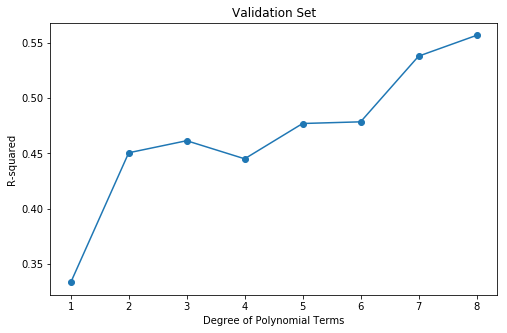

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(ols_r2_score.index, ols_r2_score.OLS, '-o')
plt.ylabel('R-squared')
plt.xlabel('Degree of Polynomial Terms')
plt.title('Validation Set')
plt.show()

**2.2** Discuss patterns you see in the results from 2.1. Which model would you select, and why?**

*your answer here*

In general, the higher degree of polynomial models, the higher R-squared in validation set, even though it's not a strict monotonic relationship. I would select the polynomial model with degree of 8, since it has the largest R-squared in validation set. 

In [25]:
model_poly = []
score_poly = []

lambdas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for n in range(1,9):
    model_hyper = []
    score_hyper = []
    for i in lambdas:
        x_train, y_train, x_val, y_val = get_matrix(bikes_train, bikes_val, poly_cols=poly_cols, degree = n, response="counts", drop_cols=drop_cols, con_cols=con_cols, dum_cols=dum_cols)
        ridge_model = Ridge(alpha = i).fit(x_train, y_train)
        r2 = ridge_model.score(x_val, y_val)
        model_hyper.append(ridge_model)
        score_hyper.append(r2)
    model_poly.append(model_hyper)
    score_poly.append(score_hyper)

ridge_df = pd.DataFrame(data = score_poly, index = np.arange(1,9,1), columns=lambdas)
ridge_df

,0.01,0.05,0.10,0.50,1.00,5.00,10.00,50.00,100.00
1,0.331425,0.333624,0.335532,0.341609,0.344063,0.347071,0.346523,0.339362,0.332251
2,0.449243,0.450845,0.452289,0.457161,0.459253,0.461034,0.459512,0.449947,0.442254
3,0.455903,0.458603,0.460957,0.468443,0.471557,0.477408,0.478889,0.471409,0.456947
4,0.442525,0.444915,0.447109,0.454469,0.457788,0.465208,0.467633,0.462909,0.452024
5,0.470381,0.472564,0.474466,0.480435,0.482854,0.487188,0.487981,0.483396,0.476681
6,0.472036,0.473639,0.475176,0.481730,0.485694,0.494278,0.496155,0.494239,0.487281
7,0.532579,0.533073,0.533352,0.532123,0.528982,0.513430,0.506373,0.491913,0.482722
8,0.551309,0.551185,0.550542,0.542471,0.533883,0.509378,0.502815,0.494530,0.489153


<Axes: >

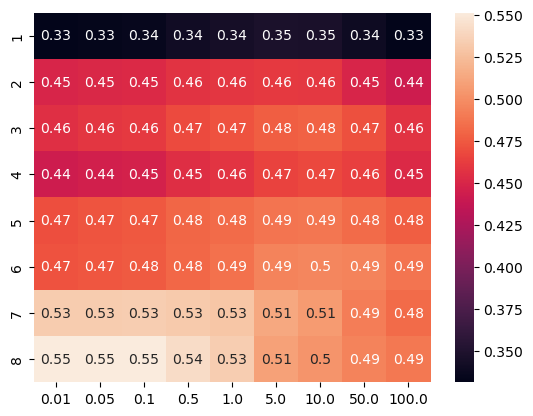

In [26]:
sns.heatmap(ridge_df,annot=True)

In [57]:
# your code here
lambdas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
ridge_r2_score = pd.DataFrame(index=range(1, 9), columns=lambdas)
# the orginal dtypes are object, whatever types of items are stored later, the type is still object
# or use ridge_r2_score = pd.DataFrame(index=range(1, 9), columns=lambdas,dtype=float)

for d in range(1, 9):
    for i, lam in enumerate(lambdas):
        x_train, y_train, x_val, y_val = \
            get_design_mats(bikes_train, bikes_val, d,
                            columns_forpoly = ['temp', 'atemp', 'hum', 'windspeed', 'hour'], 
                            bad_columns = ['counts', 'registered', 'casual', 'workingday', 'month', 'dteday'])

        ridge_reg = Ridge(alpha = lam) 
        ridge_reg.fit(x_train, y_train) 

        a = r2_score(y_val, ridge_reg.predict(x_val))
        ridge_r2_score.loc[d, lam] = r2_score(y_val, ridge_reg.predict(x_val))

In [58]:
ridge_r2_score

,0.01,0.05,0.10,0.50,1.00,5.00,10.00,50.00,100.00
1,0.331425,0.333624,0.335532,0.341609,0.344063,0.347071,0.346523,0.339362,0.332251
2,0.449243,0.450845,0.452289,0.457161,0.459253,0.461034,0.459512,0.449947,0.442254
3,0.455903,0.458603,0.460957,0.468443,0.471557,0.477408,0.478889,0.471409,0.456947
4,0.442525,0.444915,0.447109,0.454469,0.457788,0.465208,0.467633,0.462909,0.452024
5,0.470381,0.472564,0.474466,0.480435,0.482854,0.487188,0.487981,0.483396,0.476681
6,0.472036,0.473639,0.475176,0.48173,0.485694,0.494278,0.496155,0.494239,0.487281
7,0.532579,0.533073,0.533352,0.532123,0.528982,0.51343,0.506373,0.491913,0.482722
8,0.551309,0.551185,0.550542,0.542471,0.533883,0.509378,0.502815,0.49453,0.489153


Text(0.5, 1.0, 'R-squared on Validation Set')

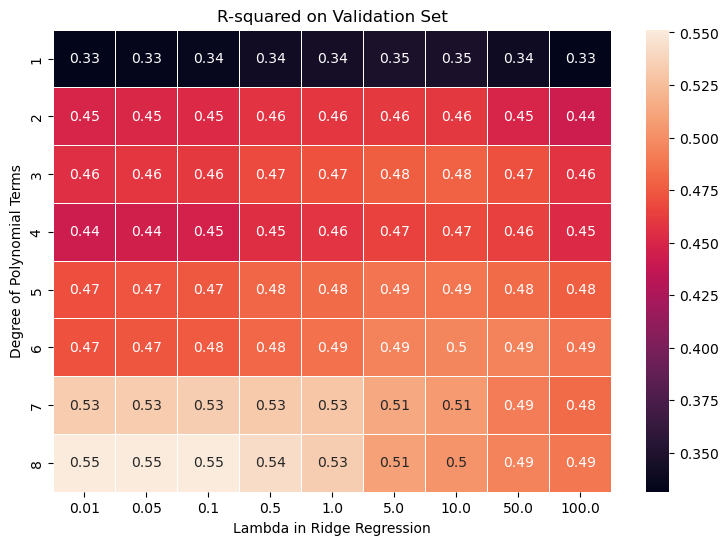

In [53]:
ridge_r2_score = ridge_r2_score.astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ridge_r2_score, annot=True, linewidths=.5, ax=ax)
# !!!!!!!!!!!!!!
# annot = True

ax.set_ylabel('Degree of Polynomial Terms')
ax.set_xlabel('Lambda in Ridge Regression')
ax.set_title('R-squared on Validation Set')

**2.4** Find the best-scoring degree and regularization combination.

In [30]:
index = ridge_df.idxmax()
index2 = index.idxmax()

print(f"the best scoring degree is {index[index2]} and the regularization is {index2}")

the best scoring degree is 8 and the regularization is 0.01


In [54]:
# your code here
ridge_r2_score.columns = ridge_r2_score.columns.map(str)
# In pandas, column names are typically of type str (string). However, in some cases, the column names may be of a different type, such as int (integer) or float (floating-point number). 
# By using the map() method in conjunction with str, the code applies the str() function to each column label, converting them to strings.

print("Best ridge model is with lambda of %s and polynomial degree of %s." % 
      (ridge_r2_score.max().idxmax(), str(ridge_r2_score[ridge_r2_score.max().idxmax()].idxmax())))

Best ridge model is with lambda of 0.01 and polynomial degree of 8.


**2.5** It's time to see how well our selected model will do on future data. Read in the provided test dataset `data/bikes_test.csv`, do any required formatting, and report the best model's $R^2$ score. How does it compare to the validation set score that made us choose this model? 

In [65]:
test_data = pd.read_csv("data/bikes_test.csv", index_col=0)
test_data.head()

,dteday,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,counts,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
7955,2011-12-03,3,0,0,0,0.24,0.2424,0.70,0.1343,4,5,9,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,12
113,2011-01-05,22,0,0,1,0.18,0.1970,0.55,0.1343,1,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
701,2011-02-01,14,0,0,1,0.22,0.2576,0.80,0.0896,5,49,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
12221,2012-05-29,10,1,0,1,0.74,0.6970,0.70,0.2985,67,116,183,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5
7255,2011-11-03,22,0,0,1,0.40,0.4091,0.82,0.0000,21,116,137,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,11


In [68]:
x_train, y_train, x_test, y_test = get_matrix(bikes_main, test_data, poly_cols=poly_cols, degree = 8, response="counts", drop_cols=drop_cols, con_cols=con_cols, dum_cols=dum_cols)
# !!!!!!!!!!!!!
# fit the model with both train and validation

ridge_model_test = Ridge(alpha=0.01).fit(x_train, y_train)
r2_test = ridge_model_test.score(x_test, y_test)

print(f"the r2 score for test is {r2_test: .4f}.\n")
print(f"the r2 score for validation is {ridge_df.loc[8, 0.01]: .4f}. \n")

the r2 score for test is  0.5868.

the r2 score for validation is  0.5513. 



In [62]:
# your code here
bikes_test = pd.read_csv("data/bikes_test.csv", index_col=0).reset_index(drop=True)
bikes_test.head()

,dteday,hour,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,counts,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,spring,summer,fall,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm,month
0,2011-12-03,3,0,0,0,0.24,0.2424,0.70,0.1343,4,5,9,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,12
1,2011-01-05,22,0,0,1,0.18,0.1970,0.55,0.1343,1,41,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2011-02-01,14,0,0,1,0.22,0.2576,0.80,0.0896,5,49,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
3,2012-05-29,10,1,0,1,0.74,0.6970,0.70,0.2985,67,116,183,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5
4,2011-11-03,22,0,0,1,0.40,0.4091,0.82,0.0000,21,116,137,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,11


In [63]:
# your code here 
d = 8
lam = 0.01

x_train, y_train, x_test, y_test = \
    get_design_mats(bikes_main, bikes_test, d,
                    columns_forpoly = ['temp', 'atemp', 'hum', 'windspeed', 'hour'], 
                    bad_columns = ['counts', 'registered', 'casual', 'workingday', 'month', 'dteday'])

ridge_reg = Ridge(alpha = lam) 
ridge_reg.fit(x_train, y_train) 

ridge_r2_score_test = r2_score(y_test, ridge_reg.predict(x_test))
print("Best model's R-squared on test data set is %f." % ridge_r2_score_test)

Best model's R-squared on test data set is 0.586768.


**2.6** Why do you think our model's test score was quite a bit worse than its validation score? Does the test set simply contain harder examples, or is something else going on?

Actually my model's test score is a little bit better than the validation score. It may happen that the test set is easier to predict, which means the reponse variable is close to our predictions even vs the training set.

!!!!!!!!!!!!!!!! harder examples, hard/easy to predict

<div class='exercise'><b> Question 3 [20pts]: Comparing Ridge, Lasso, and OLS </b> </div>

**3.1** Build a dataset with polynomial degree 1 and fit an OLS model, a Ridge model, and a Lasso model. Use `RidgeCV` and `LassoCV` to select the best regularization level from among `(.1,.5,1,5,10,50,100)`. 

Note: On the lasso model, you will need to increase `max_iter` to 100,000 for the optimization to converge.

the r2 score for OLS model training data is  0.4637.
the r2 score for OLS model test data is  0.3587.
the best regularization level for Ridge is 50.0.
the r2 score for test data for ridge is  0.3923.
the best regularization level for Lasso is 0.5
the r2 score for test data for Lasso is  0.3810.


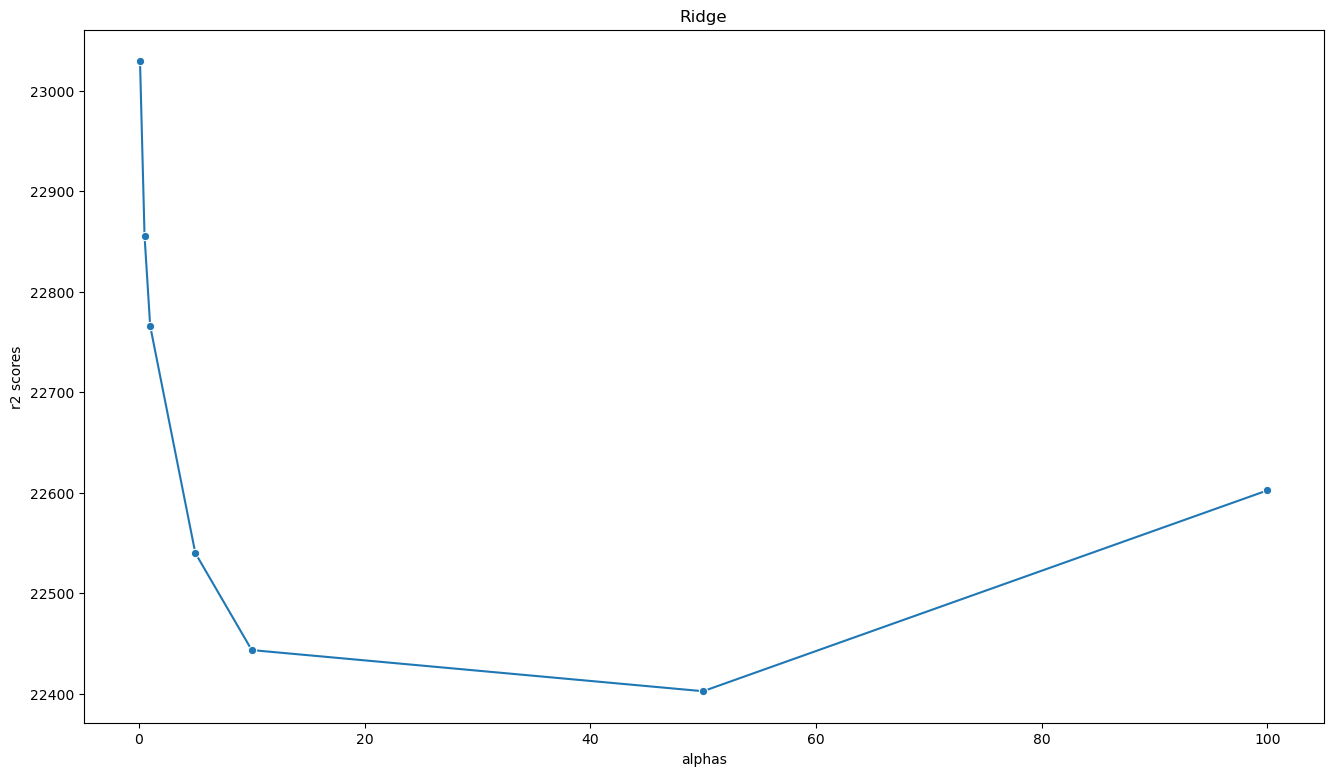

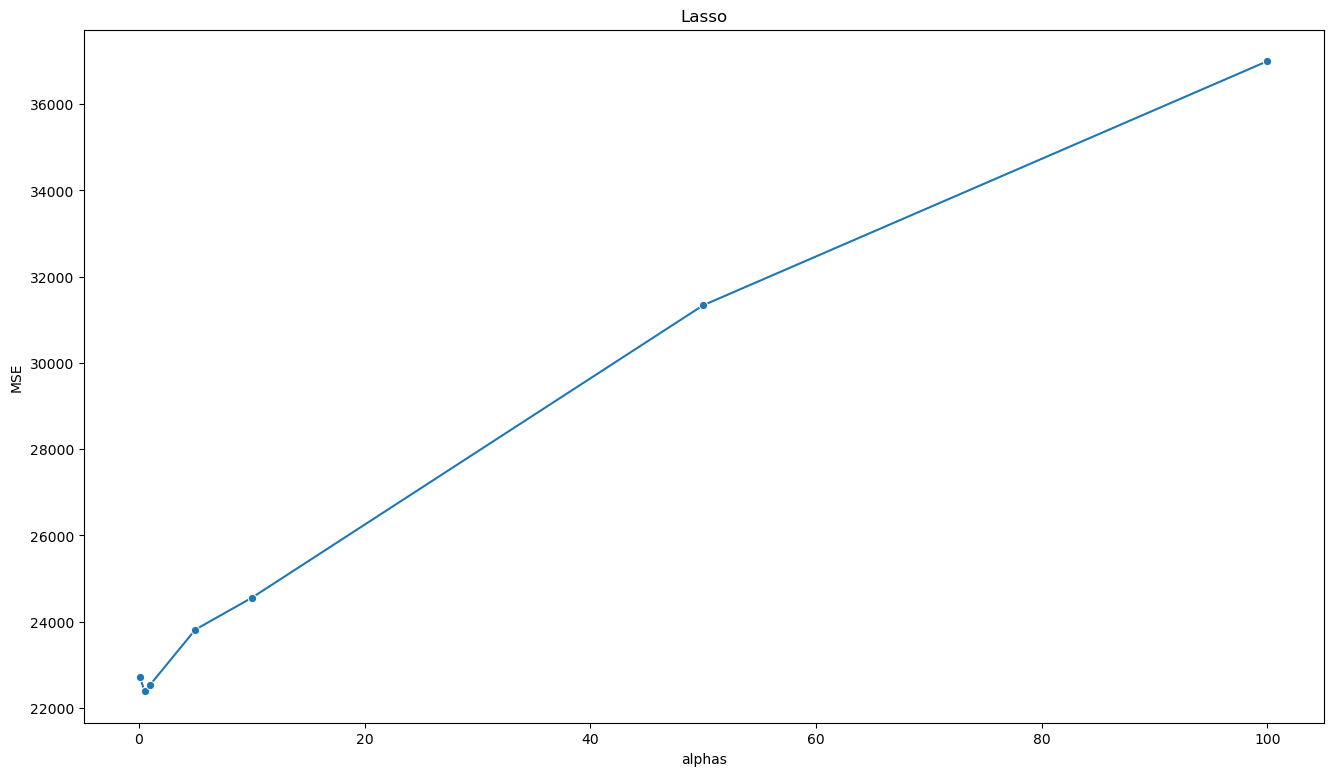

In [132]:
x_train, y_train, x_test, y_test = get_matrix(bikes_main, test_data, poly_cols=poly_cols, degree = 1, response="counts", drop_cols=drop_cols, con_cols=con_cols, dum_cols=dum_cols)

X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)

ols = OLS(y_train, X_train).fit()
r2_ols = ols.rsquared
ols_prediction = ols.predict(X_test)
print(f"the r2 score for OLS model training data is {r2_ols: .4f}.")
print(f"the r2 score for OLS model test data is {r2_score(y_test, ols_prediction): .4f}.")

alphas = [.1,.5,1,5,10,50,100]
ridge_1 = RidgeCV(alphas=alphas, store_cv_values=True).fit(x_train, y_train)
plt.figure(figsize = (16,9))
sns.lineplot(x = alphas, y = np.mean(ridge_1.cv_values_, axis = 0), marker = "o")
# cv_values_(n_samples, n_alphas)
# alpha_per_target: indicating whether to optimize the alpha value (picked from the alphas parameter list) for each target separately (for multi-output settings: multiple prediction targets).
# scoring: If None, the negative mean squared error if cv is ‘auto’ or None
# cv default is None, to use the efficient Leave-One-Out cross-validation
# best_score_: Score of base estimator with best alpha, or, if alpha_per_target=True, a score for each target.

plt.title("Ridge")
plt.xlabel("alphas")
plt.ylabel("r2 scores")

print(f"the best regularization level for Ridge is {ridge_1.alpha_}.")

ridge_best = Ridge(alpha = ridge_1.alpha_).fit(x_train, y_train)
r2_ridge = ridge_best.score(x_test, y_test)
print(f"the r2 score for test data for ridge is {r2_ridge: .4f}.")

lasso_1 = LassoCV(alphas = alphas, max_iter = 100000).fit(x_train, y_train)
plt.figure(figsize = (16,9))
sns.lineplot(x = alphas, y = np.mean(lasso_1.mse_path_, axis = 1)[::-1], marker = "o")
# The grid of alphas used for fitting is reverse of alphas
# mse_path_ (n_alphas, n_folds)
# cv default is None, to use the default 5-fold cross-validation
# alphas_: The grid of alphas used for fitting.


plt.title("Lasso")
plt.xlabel("alphas")
plt.ylabel("MSE")

print(f"the best regularization level for Lasso is {lasso_1.alpha_}")

lasso_best = Lasso(alpha = lasso_1.alpha_).fit(x_train, y_train)
r2_lasso = lasso_best.score(x_test, y_test)
print(f"the r2 score for test data for Lasso is {r2_lasso: .4f}.")



In [42]:
# Build the dataset 
d = 1
x_train, y_train, x_test, y_test = \
    get_design_mats(bikes_main, bikes_test, d,
                    columns_forpoly = ['temp', 'atemp', 'hum', 'windspeed', 'hour'], 
                    bad_columns = ['counts', 'registered', 'casual', 'workingday', 'month', 'dteday'])

lambdas = [0.1, 0.5, 1, 5, 10, 50, 100]

In [148]:
# OLS model
ols = LinearRegression()
ols.fit(x_train, y_train)

ols_r2_score_test = r2_score(y_test, ols.predict(x_test))
print("OLS Model R-squared is %f." % ols_r2_score_test)

OLS Model R-squared is 0.358744.


In [127]:
# Ridge model with leave one out CV 
ridge = RidgeCV(alphas=lambdas, store_cv_values=True).fit(x_train, y_train)

ridge_cv_mse = list(np.mean(ridge.cv_values_, axis=0))
ridge_df = pd.DataFrame({'lambdas': lambdas, 'ridge_cv_mse': ridge_cv_mse})
ridge_df

,lambdas,ridge_cv_mse
0,0.01,23130.719143
1,0.05,23076.119859
2,0.10,23029.365899
3,0.50,22855.986975
4,1.00,22766.062688
5,5.00,22540.141514
6,10.00,22443.606263
7,50.00,22402.675193
8,100.00,22602.414912


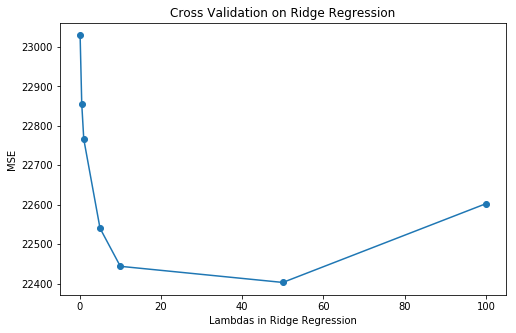

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(ridge_df.lambdas, ridge_df.ridge_cv_mse, '-o')
plt.ylabel('MSE')
plt.xlabel('Lambdas in Ridge Regression')
plt.title('Cross Validation on Ridge Regression')
plt.show()

In [46]:
print("The best lambda in Ridge Model is %f." % ridge.alpha_)

The best lambda in Ridge Model is 50.000000.


In [128]:
ridge_best_lam = 50
ridge_reg = Ridge(alpha = ridge_best_lam) 
ridge_reg.fit(x_train, y_train) 

ridge_r2_score_test = r2_score(y_test, ridge_reg.predict(x_test))
print("Ridge Model R-squared is %f." % ridge_r2_score_test)

Ridge Model R-squared is 0.392292.


In [129]:
# Lasso model with leave one out CV 
lasso = LassoCV(alphas=lambdas, cv=x_train.shape[0], max_iter=100000).fit(x_train, y_train)

df = pd.DataFrame(lasso.mse_path_)
lasso_cv_mse = df.mean(axis=1)
lasso_cv_mse = list(lasso_cv_mse)
lasso_cv_mse.reverse()
# list.reverse()
lasso_df = pd.DataFrame({'lambdas': lambdas, 'lasso_cv_mse': lasso_cv_mse})
lasso_df

,lambdas,lasso_cv_mse
0,0.01,23023.311009
1,0.05,22879.801959
2,0.10,22635.646658
3,0.50,22422.289359
4,1.00,22526.137190
5,5.00,23721.833022
6,10.00,24460.850929
7,50.00,31364.328704
8,100.00,36990.056302


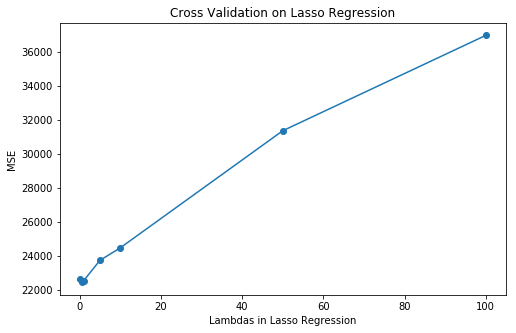

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(lasso_df.lambdas, lasso_df.lasso_cv_mse, '-o')
plt.ylabel('MSE')
plt.xlabel('Lambdas in Lasso Regression')
plt.title('Cross Validation on Lasso Regression')
plt.show()

In [50]:
print("The best lambda in Lasso Model is %f." % lasso.alpha_)

The best lambda in Lasso Model is 0.500000.


In [130]:
lasso_best_lam = 0.5
lasso_reg = Lasso(alpha = lasso_best_lam) 
lasso_reg.fit(x_train, y_train) 

lasso_r2_score_test = r2_score(y_test, lasso_reg.predict(x_test))
print("Lasso Model R-squared is %f." % lasso_r2_score_test)

Lasso Model R-squared is 0.381019.


In [52]:
# Model Comparison
print("OLS Model R-squared is %f." % ols_r2_score_test)
print("Lasso Model R-squared is %f." % lasso_r2_score_test)
print("Ridge Model R-squared is %f." % ridge_r2_score_test)

OLS Model R-squared is 0.358744.
Lasso Model R-squared is 0.381019.
Ridge Model R-squared is 0.392292.



**3.2** Plot histograms of the coefficients found by each of OLS, ridge, and lasso. What trends do you see in the magnitude of the coefficients?

In [121]:
vars(ols)

{'_results': <statsmodels.regression.linear_model.OLSResults at 0x7efda4aa5ed0>,
 '__doc__': "\n    Results class for for an OLS model.\n\n    Parameters\n    ----------\n    model : RegressionModel\n        The regression model instance.\n    params : ndarray\n        The estimated parameters.\n    normalized_cov_params : ndarray\n        The normalized covariance parameters.\n    scale : float\n        The estimated scale of the residuals.\n    cov_type : str\n        The covariance estimator used in the results.\n    cov_kwds : dict\n        Additional keywords used in the covariance specification.\n    use_t : bool\n        Flag indicating to use the Student's t in inference.\n    **kwargs\n        Additional keyword arguments used to initialize the results.\n\n    See Also\n    --------\n    RegressionResults\n        Results store for WLS and GLW models.\n\n    Notes\n    -----\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods 

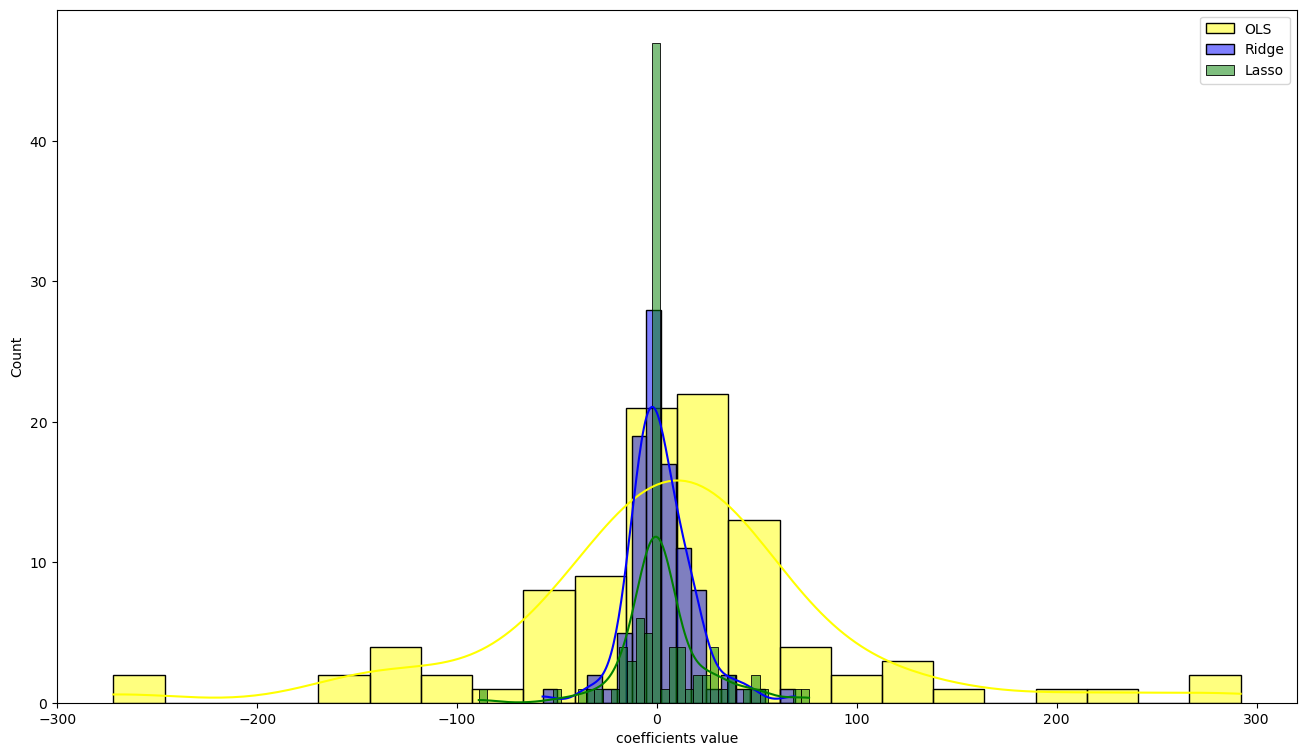

In [137]:
ols_coef = ols.params[1:]
# ols coef has a constant
ridge_coef = ridge_best.coef_
lasso_coef = lasso_best.coef_

plt.figure(figsize = (16,9))
sns.histplot(ols_coef, label = "OLS", color = "yellow", alpha =0.5, kde = True)
sns.histplot(ridge_coef, label = "Ridge", color = "blue", alpha =0.5, kde =True)
sns.histplot(lasso_coef, label = "Lasso", color = "green", alpha =0.5, kde =True)
plt.xlabel("coefficients value")
plt.legend()

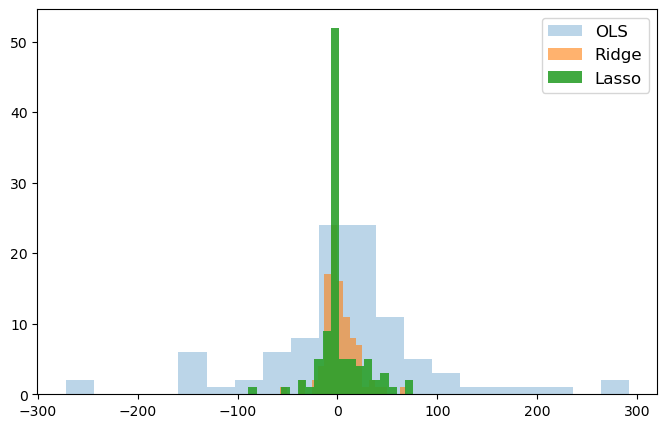

In [131]:
# your code here
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.hist(ols.coef_, 20, alpha=0.3, label="OLS")
ax.hist(ridge_reg.coef_, 20, alpha=0.6, label="Ridge")
ax.hist(lasso_reg.coef_, 20, alpha=0.9, label="Lasso")
ax.legend(prop={'size': 12})

Patterns: 
- OLS overfits the model that some coefficients of the independent variables are very large, either positive or negative. 
- Lasso has a lot of variables with mutted coefficient, which shows as the peak around zero.
- Ridge has a reasonable coefficient distribution without extra value like OLS has, nor many zeros as Lasso has.  

**3.3** The plots above show the overall distribution of coefficient values in each model, but do not show how each model treats individual coefficients. Build a plot which cleanly presents, for each feature in the data, 1) The coefficient assigned by OLS, 2) the coefficient assigned by ridge, and 3) the coefficient assigned by lasso.

Text(0.5, 0, 'coefficient values')

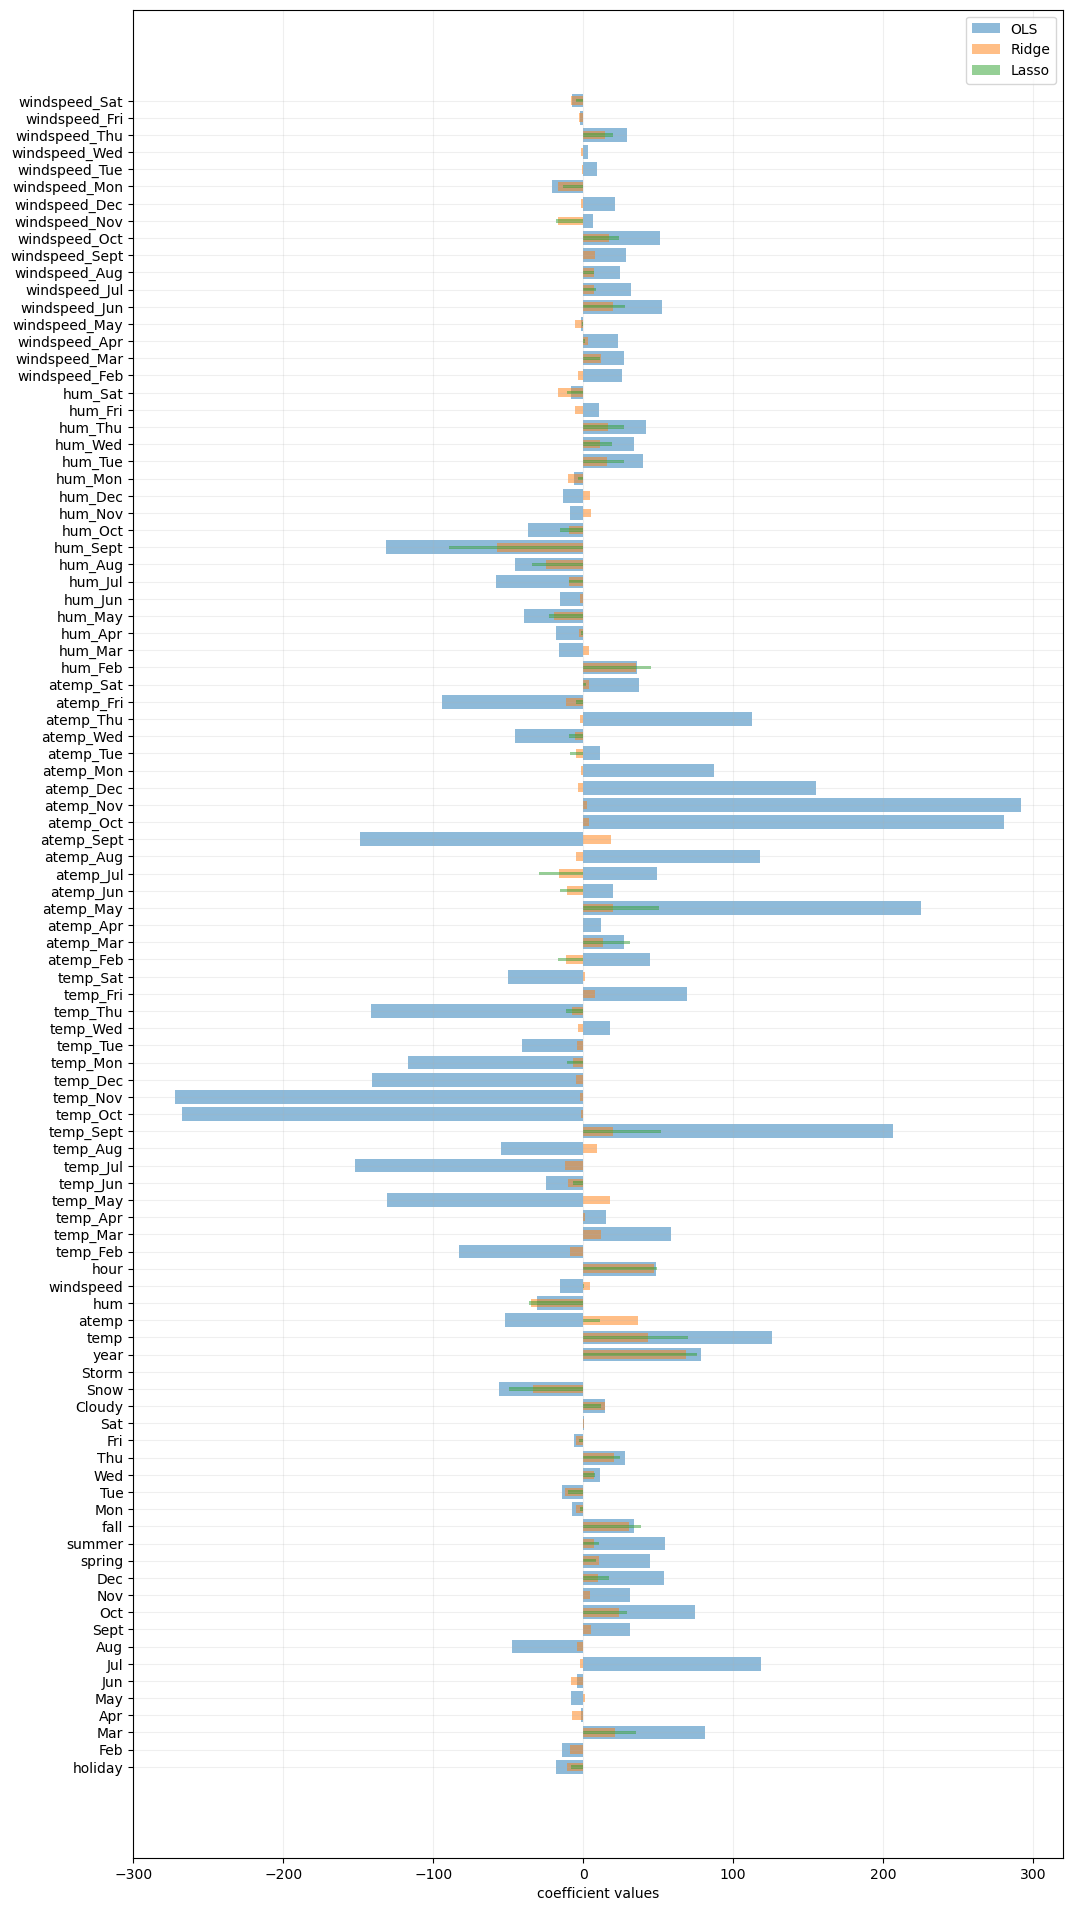

In [150]:
plt.figure(figsize = (12,24))
plt.grid(True, alpha = 0.2)
plt.barh(ridge_best.feature_names_in_, ols_coef, 0.8, label = "OLS", alpha = 0.5)
plt.barh(ridge_best.feature_names_in_, ridge_coef, 0.5, label = "Ridge", alpha =0.5)
plt.barh(ridge_best.feature_names_in_, lasso_coef, 0.2, label = "Lasso", alpha =0.5)
plt.legend()
plt.xlabel("coefficient values")


<Axes: title={'center': 'Model Coefficients'}, ylabel='index'>

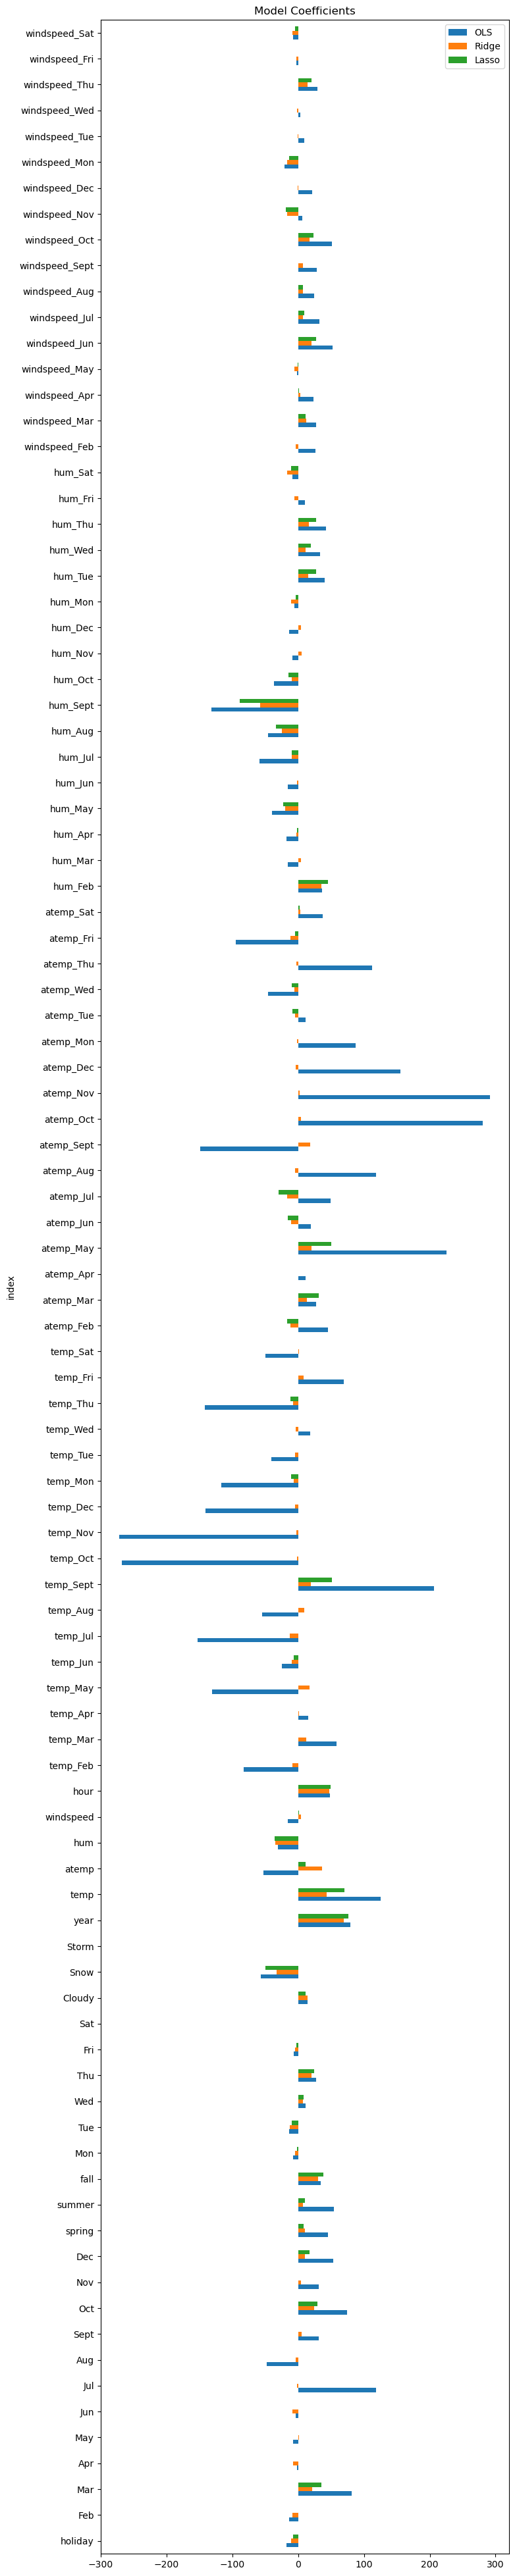

In [149]:
# your code here
df = pd.DataFrame({'index': list(x_train.columns), 
                   'OLS': list(ols.coef_), 
                   'Ridge': list(ridge_reg.coef_), 
                   'Lasso': list(lasso_reg.coef_)})
df = df.set_index('index')
df.plot.barh(figsize=(8, 50), title='Model Coefficients')
# !!!!!!!!!!!
# plot multiple barplots

**3.4** What trends do you see in the plot above? How do the three approaches handle the correlated pair `temp` and `atemp`?

We know that temp and atemp are highly correlated (HW3). The coefficients for OLS reflects multicollinearity. The magnitude of temp and atemp have been reduced considerably by Ridge and Lasso. Many of the variables have been reduced to zero for Lasso, where as Ridge has shrunk the coefficients. Storm seems to have no predictive power for any of the models. 

## Reflection 
These problems are open-ended, and you are not expected to write more than 2-3 sentences. We are interested in seeing that you have thought about these issues; you will be graded on how well you justify your conclusions here, not on what you conclude.

**4.1** Reflect back on the `get_design_mats` function you built. Writing this function useful in your analysis? What issues might you have encountered if you copy/pasted the model-building code instead of tying it together in a function? Does a `get_design_mat` function seem wise in general, or are there better options?

get_design_mats() was very helpful and it encapsulates all the scaling, interaction terms and polynomial well. We were able to reuse the code instead of copy/paste and consequently increase chances of error prone code. Scikit learn has Pipelines, which may help us achieve similar/better results. 


**4.2** What are the costs and benefits of applying ridge/lasso regularization to an overfit OLS model, versus setting a specific degree of polynomial or forward selecting features for the model?

One major advantage of lasso over ridge is that it produces simpler and more interpretable models that involve only a subset of the predictors.  Lasso indirectly performs variable selection as it shrinks coefficients down to zero. 

Ridge regression’s advantage over least squares is rooted in the bias-variance trade-off. As $\lambda$ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias. Ridge regression works best in situations where the least squares estimates have high variance.

Ridge uses L2 penalty, whereas Lasso uses L1 penalty. 

Ridge regression also has substantial computational advantages over best subset selection, which requires searching through $2^p$ models.  Forward selection uses $1 + p(p + 1)/2$ models, where p is no. of predictors. In contrast, for any fixed value of $\lambda$, ridge regression only fits a single model, and the model-fitting procedure can be performed quite quickly. 

Higher degreee of polynomial will overfit to training data, resulting in poor fit to test data. 

Source: ISLR Book


**4.3** This pset posed a purely predictive goal: forecast ridership as accurately as possible. How important is interpretability in this context? Considering, e.g., your lasso and ridge models from Question 3, how would you react if the models predicted well, but the coefficient values didn't make sense once interpreted?

If forecasting ridership as accurately as possible is the ONLY goal, interpretability is not important in this context. 

Whether lasso or ridge, as long as it can predicte well, even if the coefficients don't make sense, I would still go with the the model. The obvious reason is that the model is working well and prediction accruracy is the only thing we care about, but it's also possible that the model is capturing some relationship that humans don't easily understand yet. 



**4.4** Reflect back on our original goal of helping BikeShare predict what demand will be like in the week ahead, and thus how many bikes they can bring in for maintenance. In your view, did we accomplish this goal? If yes, which model would you put into production and why? If not, which model came closest, what other analyses might you conduct, and how likely do you think they are to work

I think we have accomplished the goal reasonably well, with R-squared of the three models ranging from 35-39%.

I would recommend Lasso model, because (1) it's clearly better than an overfitted OLS model with higher R-squared on test set, and (2) it has similar R-squared but significantly fewer predictors than Ridge model, so that the BikeShare program management team can take explicit actions to raise revenue, attract more riders, and lower maintenance cost. 
